### Libraries

In [106]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler

import matplotlib.pyplot as plt

### Data Preprocessing

In [107]:
# Read the data

dataframe = pd.read_csv('orbit.csv')


In [108]:
# Read the first 5 rows 

print(dataframe.head())

# print size of dataframe

print(dataframe.shape)

   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201
(2000, 2)


In [109]:
# Extract features
features = dataframe['time_steps']

# Extract labels
labels = dataframe['y']

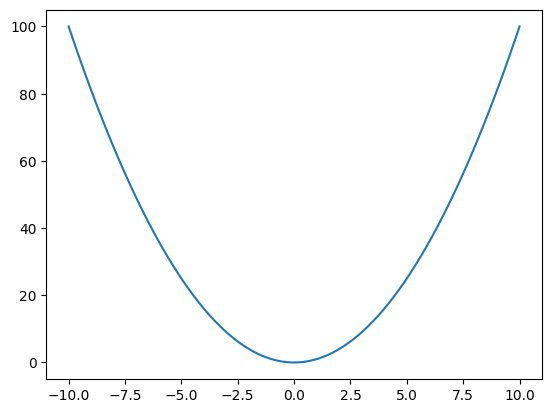

In [110]:
# Plot the curve of the features

plt.plot(features, labels)

In [111]:
# Check if there are any NaN values in the DataFrame
if dataframe.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")


There are no NaN values in the DataFrame.


In [112]:
# Data preprocessing
scaler = StandardScaler()
features = scaler.fit_transform(features.values.reshape(-1, 1))

In [113]:
## Split the dataframe into test, training and validation sets

X_train , X_test_val , Y_train, Y_test_val = train_test_split(features, labels , test_size=0.2)
X_test , X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5)

print(X_train.shape)
#print(Y_train.shape)
print(X_test.shape)
print(X_val.shape)

(1600, 1)
(200, 1)
(200, 1)


### Model Building

In [114]:
model = Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                64        
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 8)                 136       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [115]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Model Training

In [116]:
model.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
160/160 [==============================] - 1s 1ms/step - loss: 1884.7972
Epoch 2/100
160/160 [==============================] - 0s 1ms/step - loss: 1007.3836
Epoch 3/100
160/160 [==============================] - 0s 1ms/step - loss: 338.7458
Epoch 4/100
160/160 [==============================] - 0s 1ms/step - loss: 229.8373
Epoch 5/100
160/160 [==============================] - 0s 1ms/step - loss: 161.9659
Epoch 6/100
160/160 [==============================] - 0s 1ms/step - loss: 113.2803
Epoch 7/100
160/160 [==============================] - 0s 1ms/step - loss: 77.5310
Epoch 8/100
160/160 [==============================] - 0s 1ms/step - loss: 52.7830
Epoch 9/100
160/160 [==============================] - 0s 1ms/step - loss: 35.7978
Epoch 10/100
160/160 [==============================] - 0s 1ms/step - loss: 24.6572
Epoch 11/100
160/160 [==============================] - 0s 1ms/step - loss: 17.7007
Epoch 12/100
160/160 [==============================] - 0s 2ms/step - loss: 1

In [117]:
print(model.evaluate(X_test, Y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.0031
0.0031272394116967916


### Model testing

7/7 [==============================] - 0s 1ms/step


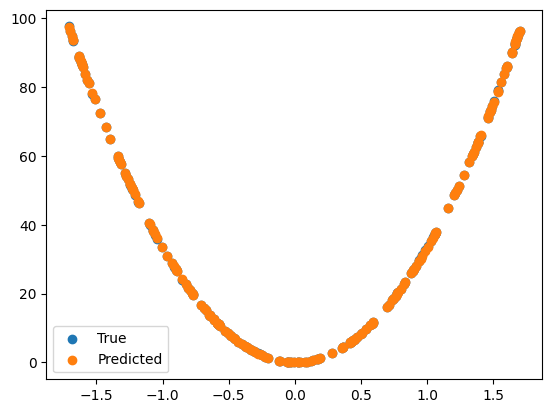

In [118]:
y_pred = model.predict(X_test)

# Plot the curve of the features
plt.scatter(X_test, Y_test, label='True')
plt.scatter(X_test, y_pred, label='Predicted')

plt.legend()


In [119]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, y_pred))

0.9999968640587497
